## 1. Install necessary libraries

In [55]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Import data

In [2]:
cancer_data  = datasets.load_breast_cancer()
cancer_data_df = pd.DataFrame(data=cancer_data.data,columns=cancer_data.feature_names)

In [3]:
cancer_data_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [4]:
cancer_data_df['target'] = cancer_data.target

In [5]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## 3. Data Understanding

In [6]:
cancer_data_df.shape

(569, 31)

In [7]:
cancer_data_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
cancer_data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

##### Since data seems to be good without any nulls and with proper datatypes there is no need to do any data cleaning activity

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cancer_data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

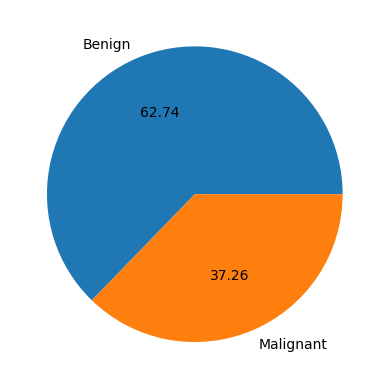

In [11]:
plt.pie(cancer_data_df['target'].value_counts(),labels=['Benign','Malignant'],autopct='%.2f')
plt.show()

## 4. Model Building

In [12]:
X = cancer_data_df.drop('target',axis=1)
y = cancer_data_df['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12,test_size=0.20,stratify=y)

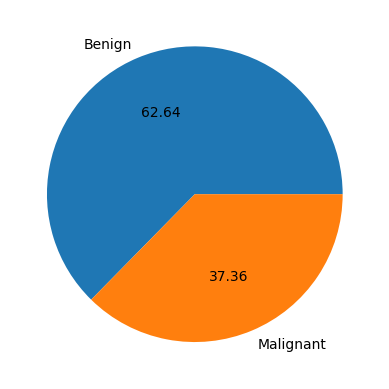

In [14]:
plt.pie(y_train.value_counts(),labels=['Benign','Malignant'],autopct='%.2f')
plt.show()

In [33]:
rf_model = RandomForestClassifier(class_weight={0:1.5,1:1})
adb_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

## 5. Model Training

In [34]:
rf_model.fit(X_train, y_train)
adb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

## 6. Model Testing | 7. Model Evaluation

In [35]:
rf_model_pred_train = rf_model.predict(X_train)
rf_model_pred_test = rf_model.predict(X_test)

adb_model_pred_train = adb_model.predict(X_train)
adb_model_pred_test = adb_model.predict(X_test)

gb_model_model_pred_train = gb_model.predict(X_train)
gb_model_model_pred_test = gb_model.predict(X_test)

In [36]:
print("RF Model Evaluation: ")
print("Training Accuracy : ",round(accuracy_score(y_train,rf_model_pred_train),4))
print("Testing Accuracy  : ",round(accuracy_score(y_test,rf_model_pred_test),4))
print("Precision Score   : ",round(precision_score(y_test,rf_model_pred_test),4))
print("Recall Score      : ",round(recall_score(y_test,rf_model_pred_test),4))
print("Confusion Matrix  : \n",confusion_matrix(y_test,rf_model_pred_test))

RF Model Evaluation: 
Training Accuracy :  1.0
Testing Accuracy  :  0.9386
Precision Score   :  0.9577
Recall Score      :  0.9444
Confusion Matrix  : 
 [[39  3]
 [ 4 68]]


In [19]:
print("Adaboost Model Evaluation: ")
print("Training Accuracy : ",round(accuracy_score(y_train,adb_model_pred_train),4))
print("Testing Accuracy  : ",round(accuracy_score(y_test,adb_model_pred_test),4))
print("Precision Score   : ",round(precision_score(y_test,adb_model_pred_test),4))
print("Recall Score      : ",round(recall_score(y_test,adb_model_pred_test),4))
print("Confusion Matrix  : \n",confusion_matrix(y_test,adb_model_pred_test))

Adaboost Model Evaluation: 
Training Accuracy :  1.0
Testing Accuracy  :  0.9649
Precision Score   :  0.9722
Recall Score      :  0.9722
Confusion Matrix  : 
 [[40  2]
 [ 2 70]]


In [20]:
print("Gradient Model Evaluation: ")
print("Training Accuracy : ",round(accuracy_score(y_train,gb_model_model_pred_train),4))
print("Testing Accuracy  : ",round(accuracy_score(y_test,gb_model_model_pred_test),4))
print("Precision Score   : ",round(precision_score(y_test,gb_model_model_pred_test),4))
print("Recall Score      : ",round(recall_score(y_test,gb_model_model_pred_test),4))
print("Confusion Matrix  : \n",confusion_matrix(y_test,gb_model_model_pred_test))

Gradient Model Evaluation: 
Training Accuracy :  1.0
Testing Accuracy  :  0.9561
Precision Score   :  0.9718
Recall Score      :  0.9583
Confusion Matrix  : 
 [[40  2]
 [ 3 69]]


### Data Preprocessing | Model Improvement

In [37]:
X_train.mean()

mean radius                 14.160264
mean texture                19.311319
mean perimeter              92.191670
mean area                  658.212088
mean smoothness              0.096337
mean compactness             0.104524
mean concavity               0.089182
mean concave points          0.049132
mean symmetry                0.181320
mean fractal dimension       0.062830
radius error                 0.408143
texture error                1.238492
perimeter error              2.896304
area error                  40.464415
smoothness error             0.007011
compactness error            0.025637
concavity error              0.031984
concave points error         0.011837
symmetry error               0.020411
fractal dimension error      0.003809
worst radius                16.342508
worst texture               25.751868
worst perimeter            107.776549
worst area                 890.433846
worst smoothness             0.132031
worst compactness            0.256061
worst concav

In [38]:
X_train.std()

mean radius                  3.553689
mean texture                 4.381424
mean perimeter              24.572015
mean area                  353.871091
mean smoothness              0.013958
mean compactness             0.053510
mean concavity               0.080630
mean concave points          0.039417
mean symmetry                0.026903
mean fractal dimension       0.006998
radius error                 0.262944
texture error                0.577478
perimeter error              1.916639
area error                  42.241296
smoothness error             0.003099
compactness error            0.018269
concavity error              0.029664
concave points error         0.006212
symmetry error               0.008048
fractal dimension error      0.002631
worst radius                 4.941421
worst texture                6.267259
worst perimeter             34.401238
worst area                 584.451716
worst smoothness             0.022576
worst compactness            0.162522
worst concav

In [56]:
standard_scaler = MinMaxScaler()
scaled_x = standard_scaler.fit_transform(X)

In [57]:
scaled_x = pd.DataFrame(data=scaled_x,columns=cancer_data.feature_names)

In [58]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_x,y,test_size=0.20,random_state=12,stratify=y)

In [59]:
rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

In [60]:
rf_model.fit(X_train_scaled,y_train)
adb_model.fit(X_train_scaled,y_train)
gb_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [61]:
rf_model_pred_train_scaled = rf_model.predict(X_train)
rf_model_pred_test_scaled = rf_model.predict(X_test)

adb_model_pred_train_scaled = adb_model.predict(X_train)
adb_model_pred_test_scaled = adb_model.predict(X_test)

gb_model_model_pred_train_scaled = gb_model.predict(X_train)
gb_model_model_pred_test_scaled = gb_model.predict(X_test)

In [62]:
print("RF Model Evaluation: ")
print("Training Accuracy : ",round(accuracy_score(y_train,rf_model_pred_train_scaled),4))
print("Testing Accuracy  : ",round(accuracy_score(y_test,rf_model_pred_test_scaled),4))
print("Precision Score   : ",round(precision_score(y_test,rf_model_pred_test_scaled),4))
print("Recall Score      : ",round(recall_score(y_test,rf_model_pred_test_scaled),4))
print("Confusion Matrix  : \n",confusion_matrix(y_test,rf_model_pred_test_scaled))

RF Model Evaluation: 
Training Accuracy :  0.3736
Testing Accuracy  :  0.3684
Precision Score   :  0.0
Recall Score      :  0.0
Confusion Matrix  : 
 [[42  0]
 [72  0]]


d:\Data Science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
print("adb Model Evaluation: ")
print("Training Accuracy : ",round(accuracy_score(y_train,adb_model_pred_train_scaled),4))
print("Testing Accuracy  : ",round(accuracy_score(y_test,adb_model_pred_test_scaled),4))
print("Precision Score   : ",round(precision_score(y_test,adb_model_pred_test_scaled),4))
print("Recall Score      : ",round(recall_score(y_test,adb_model_pred_test_scaled),4))
print("Confusion Matrix  : \n",confusion_matrix(y_test,adb_model_pred_test_scaled))

adb Model Evaluation: 
Training Accuracy :  0.3736
Testing Accuracy  :  0.3684
Precision Score   :  0.0
Recall Score      :  0.0
Confusion Matrix  : 
 [[42  0]
 [72  0]]


d:\Data Science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Learning Rate

In [78]:
adb_model_low_learn = AdaBoostClassifier(learning_rate=0.02)
adb_model_high_learn = AdaBoostClassifier(learning_rate=0.5)

In [79]:
adb_model_low_learn.fit(X_train,y_train)
adb_model_high_learn.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5)

In [80]:
adb_model_low_learn_pred = adb_model_low_learn.predict(X_test)
adb_model_high_learn_pred = adb_model_high_learn.predict(X_test)

In [81]:
print(accuracy_score(y_test,adb_model_low_learn_pred))
print(accuracy_score(y_test,adb_model_high_learn_pred))

0.9210526315789473
0.9736842105263158
